In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt

In [54]:
df=pds.read_excel('data2.xlsx')
df=df.sample(frac=1)

In [55]:
df.head(10)

,category,Temperature(K),Pressure(Mpa),Sound Speed(m/s）
377,11,270,0.1,645.9702
523,15,270,0.1,188.3500
445,12,370,5.0,431.3705
337,10,250,0.1,614.6900
549,15,310,10.0,489.4600
387,11,310,0.5,480.3696
162,5,250,1.0,563.5100
225,7,310,0.1,154.2800
328,9,290,10.0,720.1700
620,18,160,0.1,773.6600


In [56]:
df.columns=['class','temp','pre','speed']

In [57]:
df.speed.corr(df.temp),df.speed.corr(df.pre),df.speed.corr(df.pre*df.temp)

(-0.6743444953663595, 0.3274088248839324, 0.21602964800084878)

In [58]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'speed')

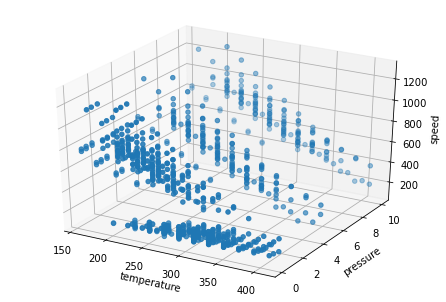

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.temp, df.pre, df.speed)
ax.set_xlabel('temperature')
ax.set_ylabel('pressure')
ax.set_zlabel('speed')

In [60]:
df.pre.unique()

array([ 0.1,  5. , 10. ,  0.5,  1. ])

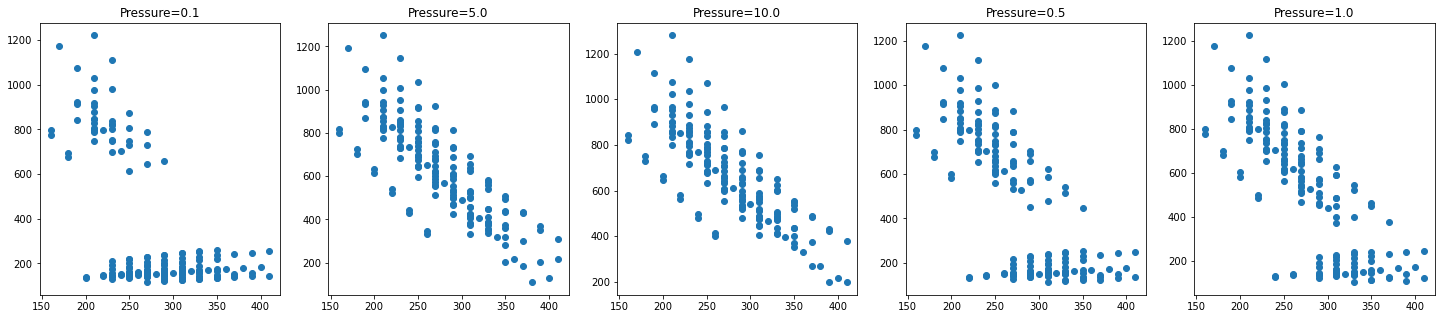

In [61]:
fig,axs=plt.subplots(1,5,figsize=(25,5))
j=0
for i in df.pre.unique():
    df_temporary=df[df.pre==i]
    axs[j].scatter(df_temporary.temp,df_temporary.speed)
    axs[j].set_title('Pressure={}'.format(i))
    j+=1

## 决策树模型，交叉验证r2=0.73

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [70]:
param_grid={
    'max_depth':[5,10,20,30],
    'min_samples_leaf':[1,2,5,10,20,40,80]
}

In [71]:
cart_cv=GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=5,scoring='r2')

In [72]:
cart_cv.fit(df[['class','pre','temp']],df['speed'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40, 80]},
             scoring='r2')

In [73]:
cart_cv.best_score_,cart_cv.best_params_

(0.7315040654284025, {'max_depth': 30, 'min_samples_leaf': 2})

## GDBT模型，交叉验证r2=0.88

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
gbdt=GradientBoostingRegressor()

In [81]:
param_grid={
    'learning_rate':[0.01,0.05,0.1,0.2,0.5,1],
    'n_estimators':[10,20,50,100],
    'max_depth':[5,10,20],
    'min_samples_leaf':[1,2,5,10,20,40,80]
}

In [82]:
gbdt_cv=GridSearchCV(GradientBoostingRegressor(),param_grid=param_grid,cv=5,scoring='r2')

In [83]:
gbdt_cv.fit(df[['class','pre','temp']],df['speed'])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40, 80],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='r2')

In [84]:
gbdt_cv.best_score_,gbdt_cv.best_params_

(0.8734812548388531,
 {'learning_rate': 0.2,
  'max_depth': 10,
  'min_samples_leaf': 20,
  'n_estimators': 100})

In [137]:
gbdt=GradientBoostingRegressor(learning_rate=0.1,max_depth=10,min_samples_leaf=20,n_estimators=100)

In [138]:
train=df[:600]
test=df[601:]

In [139]:
gbdt.fit(train[['class','pre','temp']],train['speed'])

GradientBoostingRegressor(max_depth=10, min_samples_leaf=20)

In [140]:
res=gbdt.predict(test[['class','pre','temp']])

In [141]:
from sklearn.metrics import r2_score

In [142]:
r2_score(res, test['speed'])

0.8803665478670759